<a href="https://colab.research.google.com/github/olha-vlasiichuk/Sales-data-visualization/blob/main/Data_Visualization_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Collabs

Mounted at /content/drive
/content/drive/MyDrive/Collabs


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sales_data = pd.read_csv("sales_data.csv")
print(sales_data)


       Order_Date      Time  Aging  Customer_Id Gender Device_Type  \
0      2018-01-01  10:11:40    5.0        29317   Male         Web   
1      2018-01-01  22:30:44    7.0        42270   Male         Web   
2      2018-01-01  21:55:31   10.0        14563   Male         Web   
3      2018-01-01  13:57:15    9.0        58601   Male         Web   
4      2018-01-01  15:17:41    2.0        48342   Male         Web   
...           ...       ...    ...          ...    ...         ...   
51285  2018-12-30  16:20:22    5.0        88891   Male         Web   
51286  2018-12-30  11:52:02    7.0        74259   Male         Web   
51287  2018-12-30  15:06:46    5.0        62596   Male         Web   
51288  2018-12-30  15:36:49    1.0        77349   Male         Web   
51289  2018-12-30  13:49:02    7.0        79637   Male         Web   

      Customer_Login_type    Product_Category                 Product  Sales  \
0                  Member  Auto & Accessories       Car Media Players  140.0   

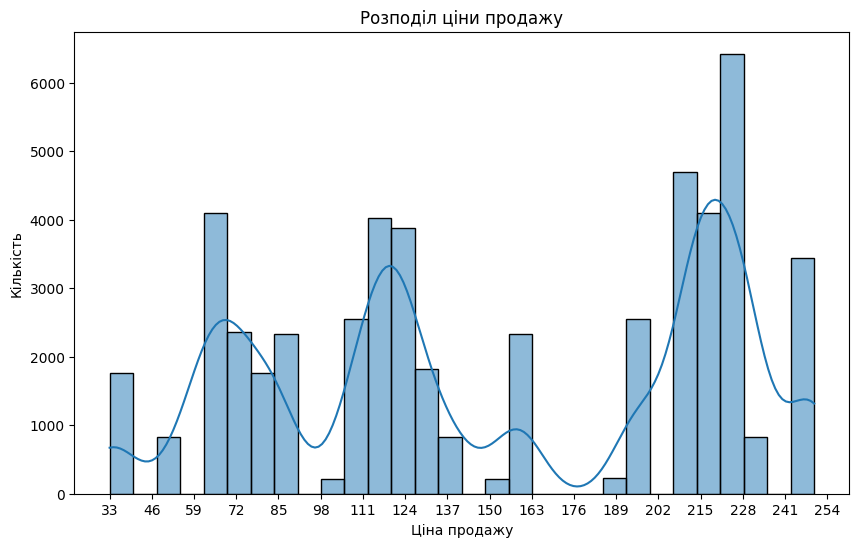

In [ ]:
min_sales = sales_data['Sales'].min()
max_sales = sales_data['Sales'].max()
xticks = np.arange(min_sales, max_sales+13, 13)
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Sales'], bins=30, kde=True)
plt.title('Розподіл ціни продажу')
plt.xlabel('Ціна продажу')
plt.ylabel('Кількість')
plt.xticks(xticks)
plt.show()

Найчастіші продажі від 210 до 228 доларів. Спостерігається коливаючий характер розподілу продажів.

In [ ]:
from itertools import groupby
sales_data["Order_Date"] = pd.to_datetime(sales_data["Order_Date"])
daily_sales = sales_data.groupby('Order_Date')['Sales'].sum()

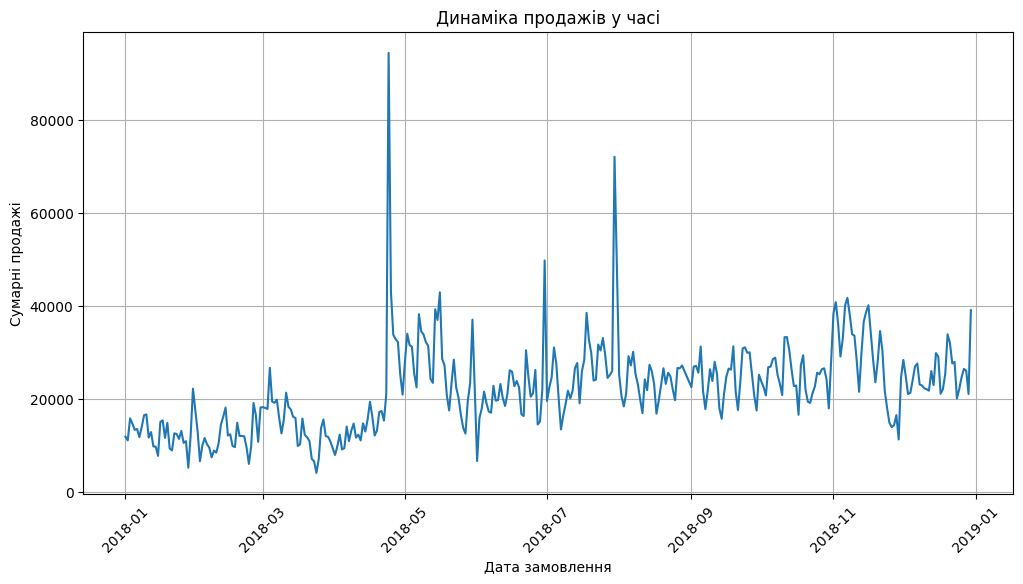

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Дата замовлення')
plt.ylabel('Сумарні продажі')
plt.title('Динаміка продажів у часі')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Помічаємо зростаючу тенденцію по графіку

([0, 1, 2, 3],
 [Text(0, 0, 'Auto & Accessories'),
  Text(1, 0, 'Electronic'),
  Text(2, 0, 'Fashion'),
  Text(3, 0, 'Home & Furniture')])

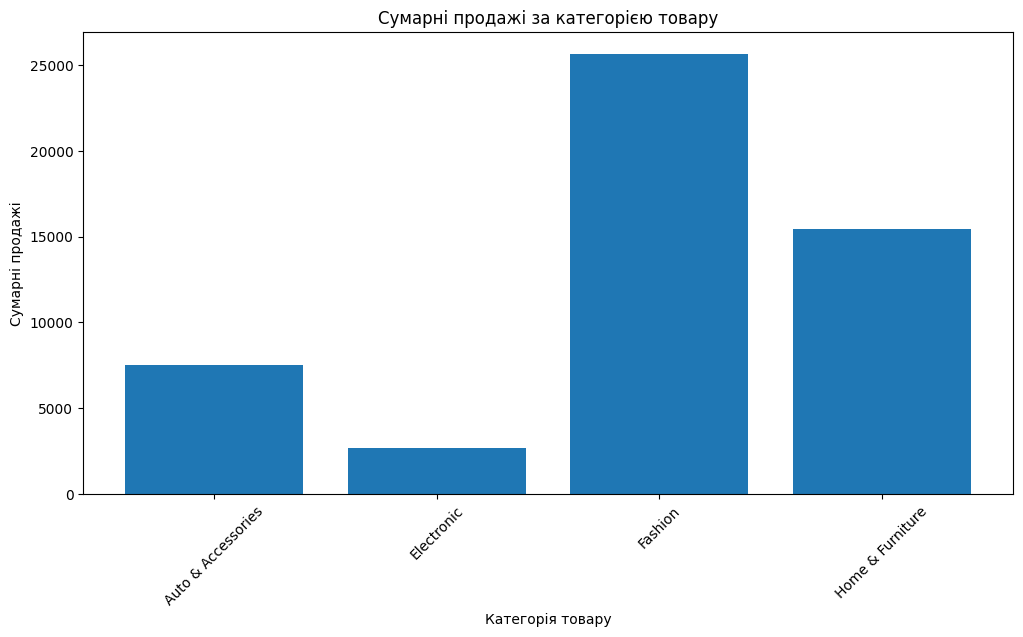

In [ ]:
grouped_by_category = sales_data.groupby('Product_Category')['Order_Date'].size()
plt.figure(figsize=(12, 6))
plt.bar(grouped_by_category.index, grouped_by_category.values)
plt.xlabel('Категорія товару')
plt.ylabel('Сумарні продажі')
plt.title('Сумарні продажі за категорією товару')
plt.xticks(rotation=45)

Найпопулярніша категорія - Fashion, найменш популярною є Electronic

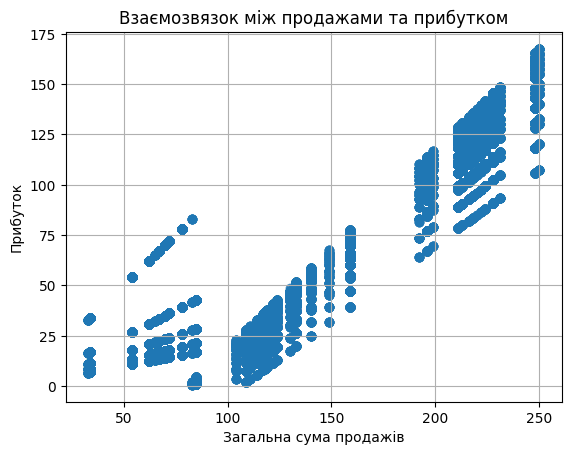

In [ ]:
plt.scatter(sales_data['Sales'], sales_data['Profit'], alpha=0.5)
plt.xlabel('Загальна сума продажів')
plt.ylabel('Прибуток')
plt.title('Взаємозвязок між продажами та прибутком')
plt.grid(True)
plt.show()

Спостерігаємо позитивну кореляцію між прибутком та продажами.

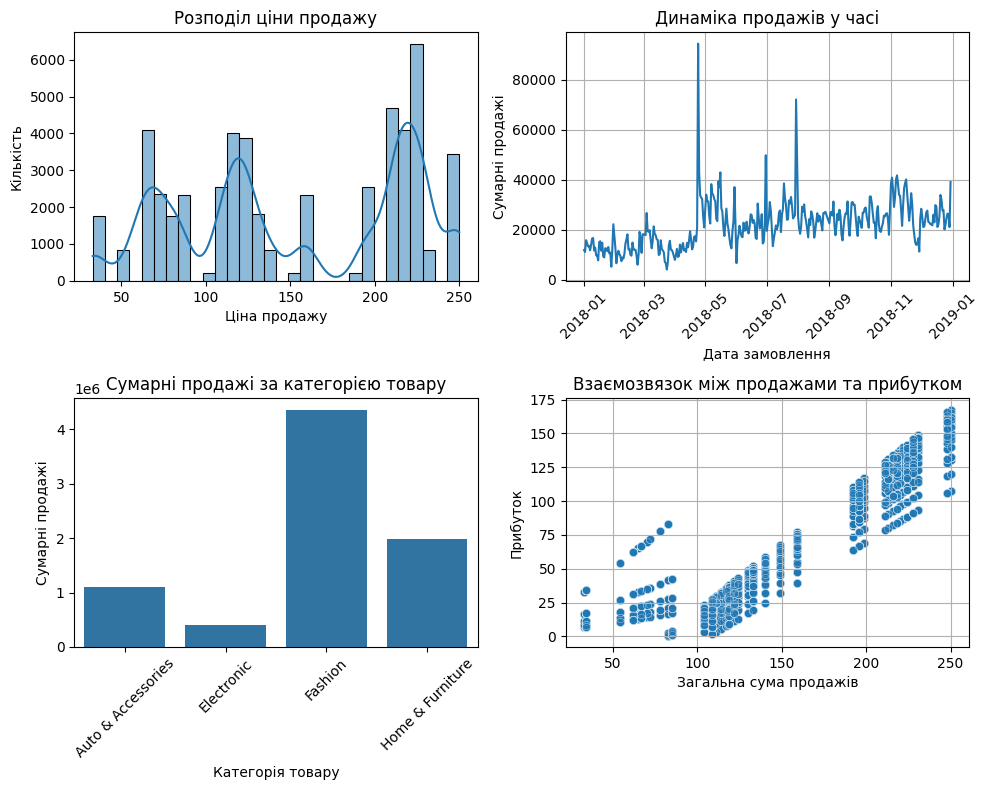

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

min_sales = sales_data['Sales'].min()
max_sales = sales_data['Sales'].max()
ax[0, 0].set_xticks = np.arange(min_sales, max_sales+13, 13)
sns.histplot(sales_data['Sales'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Розподіл ціни продажу')
ax[0, 0].set_xlabel('Ціна продажу')
ax[0, 0].set_ylabel('Кількість')


from itertools import groupby
sales_data["Order_Date"] = pd.to_datetime(sales_data["Order_Date"])
daily_sales = sales_data.groupby('Order_Date')['Sales'].sum()
ax[0, 1].plot(daily_sales.index, daily_sales.values)
ax[0, 1].set_xlabel('Дата замовлення')
ax[0, 1].set_ylabel('Сумарні продажі')
ax[0, 1].set_title('Динаміка продажів у часі')
ax[0, 1].grid(True)
ax[0, 1].tick_params(axis='x', rotation=45)


grouped_by_category = sales_data.groupby('Product_Category')['Sales'].sum()
sns.barplot(x=grouped_by_category.index, y=grouped_by_category.values, ax=ax[1, 0])
ax[1, 0].set_xlabel('Категорія товару')
ax[1, 0].set_ylabel('Сумарні продажі')
ax[1, 0].set_title('Сумарні продажі за категорією товару')
ax[1, 0].tick_params(axis='x', rotation=45)

sns.scatterplot(x='Sales', y='Profit', data=sales_data, alpha=0.5, ax=ax[1, 1])
ax[1, 1].set_xlabel('Загальна сума продажів')
ax[1, 1].set_ylabel('Прибуток')
ax[1, 1].set_title('Взаємозвязок між продажами та прибутком')
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()